In [79]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , roc_auc_score , roc_curve , classification_report , confusion_matrix

from sklearn.model_selection import GridSearchCV
import os
from copy import deepcopy
import warnings


In [80]:
data = pd.read_csv(R"\Users\utilisateur\Documents\PYTHON\modelbank\bank-full.csv")

In [81]:
data.head ( )

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [82]:
#Categorical columns:
categorical = data.select_dtypes ( include = "object" )
print ( "Categorical columns:" )
c = 1
for i in categorical.columns:
    print ( c , "." , i )
    c += 1

Categorical columns:
1 . job
2 . marital
3 . education
4 . default
5 . housing
6 . loan
7 . contact
8 . month
9 . poutcome
10 . y


In [83]:
#Numerical columns:
numerical = data.select_dtypes ( exclude = "object" )
print ( "Numerical columns:" )
c = 1
for i in numerical.columns:
    print ( c , "." , i )
    c += 1

Numerical columns:
1 . age
2 . balance
3 . day
4 . duration
5 . campaign
6 . pdays
7 . previous


In [84]:
print ( "Number of Rows:" , data.shape [ 0 ] )
print ( "Number of Columns:" , data.shape [ 1 ] )

Number of Rows: 45211
Number of Columns: 17


In [85]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [86]:
numerical.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [87]:
categorical.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [88]:
#recherche des valeurs nulles
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [89]:
# Analyse univariée pour les colonnes catégorielles avec comptage de valeurs et tracé de comptage

for i in categorical.columns:
    print ( "Column:" , i )
    print ( data [ i ].value_counts ( ) )
    #f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
    #sns.countplot ( data [ i ] )
    #plt.xticks ( rotation = 45 )
    #plt.show ( )
    print ( "\n" )

Column: job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


Column: marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


Column: education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


Column: default
no     44396
yes      815
Name: default, dtype: int64


Column: housing
yes    25130
no     20081
Name: housing, dtype: int64


Column: loan
no     37967
yes     7244
Name: loan, dtype: int64


Column: contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


Column: month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
de

In [90]:
# Analyse univariée pour les colonnes numériques utilisant le tracé de distribution et la vérification de l'asymétrie

for i in numerical.columns:
    print ( "Column:" , i )
    print ( "Skewness for {} is {}".format ( i , round ( data [ i ].skew ( ) , 3 ) ) )
    #sns.distplot ( data [ i ] )
    #plt.show ( )

Column: age
Skewness for age is 0.685
Column: balance
Skewness for balance is 8.36
Column: day
Skewness for day is 0.093
Column: duration
Skewness for duration is 3.144
Column: campaign
Skewness for campaign is 4.899
Column: pdays
Skewness for pdays is 2.616
Column: previous
Skewness for previous is 41.846


In [91]:
#Modélisation statistique
#Test de relation à l'aide du test du Chi-square pour vérifier les associations entre les variables catégorielles

cat1 , cat2 = [ ] , [ ]
for i in categorical.columns:
    if data [ i ].nunique ( ) == 2:
        cat1.append ( i )
    else:
        cat2.append ( i )

In [92]:
for i in range ( len ( cat1 ) ):
    for j in range ( i , len ( cat1 ) ):
        if i != j:
            print ( "Test des proportions Z pour {} et {}".format ( cat1 [ i ] , cat1 [ j ] ) )
            print ( "Test d'hypothèse pour les proportions entre {} et {}".format ( cat1 [ i ] , cat1 [ j ] ) )
            print ( "Ha: La proportion de personnes optant pour Oui dans {j} et non {i} n'est pas égale à la proportion de personnes optant pour Oui dans {j} et {i}".format ( i = cat1 [ i ] , j = cat1 [ j ] ) )
            print ( "Ho: La proportion de personnes optant pour Oui dans {j} et non {i} est égale à la proportion de personnes optant pour Oui dans {j} et {i}".format ( i = cat1 [ i ] , j = cat1 [ j ] ) )
            c =  pd.crosstab ( data [ cat1 [ i ] ]  , data [ cat1 [ j ] ] )
            print ( c )
            pvalue = round ( proportions_ztest ( [ c [ "yes" ] [ 0 ] , c [ "yes" ] [ 1 ] ] , 
                                      [ c [ "yes" ] [ 0 ] + c [ "no" ] [ 0 ] , 
                                      c [ "yes" ] [ 1 ] + c [ "no" ] [ 1 ] ] ) [ 1 ] , 5 )
            print (  "p-value is" , pvalue )
            if pvalue < 0.05:
                print ( "Nous rejetons Ho car la valeur de p de {} est inférieure à l'alpha de 0,05.".format ( pvalue ) )
                print ( "Par conséquent, nous concluons en acceptant une autre hypothèse." )
                print ( "La proportion de personnes optant pour Oui dans {j} et non {i} n'est pas égale à la proportion de personnes optant pour Oui dans {j} et {i}".format ( i = cat1 [ i ] , j = cat1 [ j ] ) )
            else:
                print ( "Nous ne parvenons pas à rejeter Ho car la valeur de p de {} est supérieure à alpha de 0,05.".format ( pvalue ) )
                print ( "Par conséquent, nous concluons en acceptant l'hypothèse nulle." )
                print ( "La proportion de personnes optant pour Oui dans {j} et non {i} est égale à la proportion de personnes optant pour Oui dans {j} et {i}".format ( i = cat1 [ i ] , j = cat1 [ j ] ) )
            print ( "\n" )

Test des proportions Z pour default et housing
Test d'hypothèse pour les proportions entre default et housing
Ha: La proportion de personnes optant pour Oui dans housing et non default n'est pas égale à la proportion de personnes optant pour Oui dans housing et default
Ho: La proportion de personnes optant pour Oui dans housing et non default est égale à la proportion de personnes optant pour Oui dans housing et default
housing     no    yes
default              
no       19701  24695
yes        380    435
p-value is 0.20015
Nous ne parvenons pas à rejeter Ho car la valeur de p de 0.20015 est supérieure à alpha de 0,05.
Par conséquent, nous concluons en acceptant l'hypothèse nulle.
La proportion de personnes optant pour Oui dans housing et non default est égale à la proportion de personnes optant pour Oui dans housing et default


Test des proportions Z pour default et loan
Test d'hypothèse pour les proportions entre default et loan
Ha: La proportion de personnes optant pour Oui dans l

## Vérification des corrélations entre les variables numériques

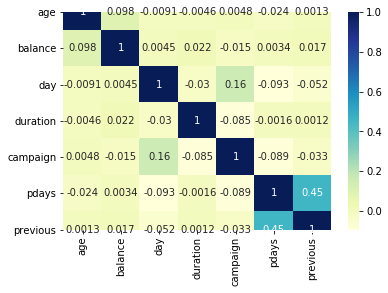

In [93]:
f , ax = plt.subplots (  )
sns.heatmap ( numerical.corr ( ) , cmap = "YlGnBu" , annot = True )
plt.show ( )

Utilisation de Label Encoder pour les variables catégorielles

In [114]:
for i in categorical.columns:
    le = LabelEncoder()
    data [ i ] = le.fit_transform( data [ i ] )

Division des données en X et y

In [115]:
X = data.drop ( "y" , axis = 1 )
y = data [ "y" ]

Logitmodel pour les données --> fit

In [116]:
xc = sm.add_constant( X )
model = sm.Logit ( y , xc ).fit ( )
model.summary ( )

C:\Users\utilisateur\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.267322
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45194
Method:                           MLE   Df Model:                           16
Date:                Tue, 25 Feb 2020   Pseudo R-squ.:                  0.2592
Time:                        17:12:13   Log-Likelihood:                -12086.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0771      0.147    -27.728      0.000      -4.365      -3.789
age            0.0084      0.002      4.992      0.000       0.005       0.012
job            0.0092      0.005      1.710      0.087      -0.001       0.020
marital        0.2231      0.031      7.189      0.000       0.162       0.284
education      0.1989      0.023      8.633      0.000       0.154       0.244
default       -0.3585      0.160     -2.243      0.025      -0.672      -0.045
balance     1.787e-05   4.52e-06      3.953      0.000    9.01e-06    2.67e-05
housing       -1.0368      0.038    -27.303      0.000      -1.111      -0.962
loan          -0.7041      0.057    -12.333      0.000      -0.816      -0.592
contact       -0.6452      0.027    -23.923      0.000      -0.698      -0.592
day           -0.0051      0.002     -2.470      0.014      -0.009      -0.001
month          0.0392      0.006      7.044      0.000       0.028       0.050
duration       0.0039    6.1e-05     64.712      0.000       0.004       0.004
campaign      -0.1311      0.010    -13.052      0.000      -0.151      -0.111
pdays          0.0036      0.000     14.108      0.000       0.003       0.004
previous       0.0893      0.008     11.140      0.000       0.074       0.105
poutcome       0.2300      0.029      7.877      0.000       0.173       0.287
==============================================================================
"""

Vérification des fonctionnalités insignifiantes du Logitmodel

In [109]:
insignificant = [ ]
j = 0
for i in model.pvalues:
    if i > 0.05:
        insignificant.append ( model.pvalues.index [ j ] )
    j += 1
print ( "The insignificant features are:" , insignificant )

AttributeError: 'list' object has no attribute 'pvalues'

In [110]:
X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size = 0.3 , random_state = 37 )

# Logistic Regression

In [111]:
lr = LogisticRegression ( )
lr.fit ( X_train , y_train )
lr_pred_train = lr.predict ( X_train )
lr_pred_test = lr.predict ( X_test )
cm = confusion_matrix ( y_test , lr_pred_test )
model.append ( "Logistic Regression" )
train.append ( round ( accuracy_score ( y_train , lr_pred_train ) , 3 ) )
test.append ( round ( accuracy_score ( y_test , lr_pred_test ) , 3 ) )
type1.append ( cm [ 0 , 1 ] )
type2.append ( cm [ 1 , 0 ] )
correct.append ( cm [ 0 , 0 ] + cm [ 1 , 1 ] )
errors.append ( cm [ 1 , 0 ] + cm [ 0 , 1 ] )
sens.append ( round ( cm [ 1 , 1 ] / ( cm [ 1 , 1 ] + cm [ 1 , 0 ] ) , 3 ) )
spec.append ( round ( cm [ 0 , 0 ] / ( cm [ 0 , 0 ] + cm [ 0 , 1 ] ) , 3 ) )
ROC.append ( round ( roc_auc_score ( y_test , lr.predict_proba ( X_test ) [ : , 1 ] ) , 3 ) )
print ( "Train score:" , round ( accuracy_score ( y_train , lr_pred_train ) , 3 ) )
print ( "Test score:" , round ( accuracy_score ( y_test , lr_pred_test ) , 3 ) )
print ( "Test Classification Report:\n" , classification_report ( y_test , lr_pred_test ) )
print ( "Test Confusion Matrix:\n" , cm )

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train score: 0.892
Test score: 0.889
Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     12005
           1       0.55      0.21      0.30      1559

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.86      0.89      0.87     13564

Test Confusion Matrix:
 [[11734   271]
 [ 1234   325]]


In [113]:
lr = LogisticRegression ( )
lr.fit (X_train, y_train )

lr_pred_train = lr.predict ( X_train_sm )
lr_pred_test = lr.predict ( X_test )
cm = confusion_matrix ( y_test , lr_pred_test )
model.append ( "Logistic Regression with SMOTE" )
train.append ( round ( accuracy_score ( y_train_sm , lr_pred_train ) , 3 ) )
test.append ( round ( accuracy_score ( y_test , lr_pred_test ) , 3 ) )
type1.append ( cm [ 0 , 1 ] )
type2.append ( cm [ 1 , 0 ] )
correct.append ( cm [ 0 , 0 ] + cm [ 1 , 1 ] )
errors.append ( cm [ 1 , 0 ] + cm [ 0 , 1 ] )
sens.append ( round ( cm [ 1 , 1 ] / ( cm [ 1 , 1 ] + cm [ 1 , 0 ] ) , 3 ) )
spec.append ( round ( cm [ 0 , 0 ] / ( cm [ 0 , 0 ] + cm [ 0 , 1 ] ) , 3 ) )
ROC.append ( round ( roc_auc_score ( y_test , lr.predict_proba ( X_test ) [ : , 1 ] ) , 3 ) )
print ( "Train score:" , round ( accuracy_score ( y_train_sm , lr_pred_train ) , 3 ) )
print ( "Test score:" , round ( accuracy_score ( y_test , lr_pred_test ) , 3 ) )
print ( "Test Classification Report:\n" , classification_report ( y_test , lr_pred_test ) )
print ( "Test Confusion Matrix:\n" , cm )

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'X_train_sm' is not defined